<a href="https://colab.research.google.com/github/SeongBeomLEE/Study/blob/main/DataStudy/%ED%94%BC%EB%A7%88_%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 경고무시
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 스코어: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot_and_f1(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  f1 = 2 * (precisions * recalls) / (precisions + recalls)

  plt.figure(figsize=(10,8))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
  plt.plot(thresholds, f1[0:threshold_boundary], linestyle='-', label='f1')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recalls and F1 value')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


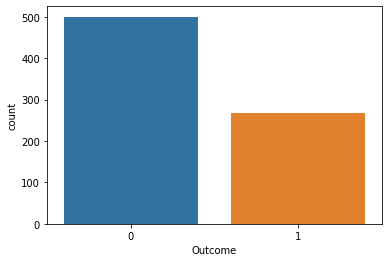

In [ ]:
# 타겟 라벨의 분포 확인
# 약간 불균형함
sns.countplot(data = df, x='Outcome')

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

lr_cif = LogisticRegression()
lr_cif.fit(x_train, y_train)
pred = lr_cif.predict(x_test)
pred_proba = lr_cif.predict_proba(x_test)
pred_proba_c1 = pred_proba[:, 1]

get_clf_eval(y_test, pred, pred_proba_c1)

오차 행렬
[[88 12]
 [23 31]]
정확도 : 0.7727, 정밀도 : 0.7209, 재현율 : 0.5741, F1 스코어: 0.6392, AUC: 0.7919


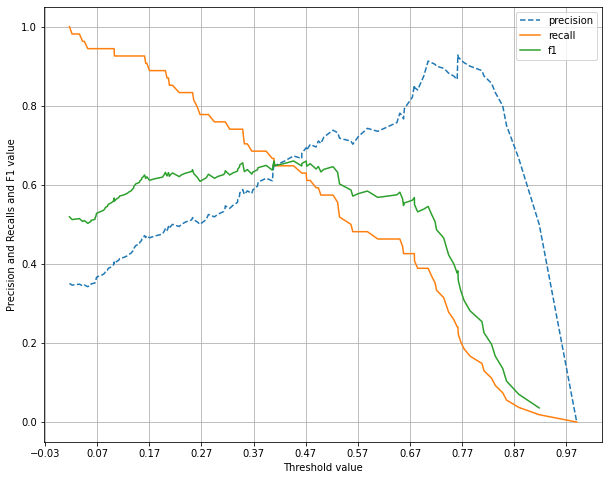

In [ ]:
precision_recall_curve_plot_and_f1(y_test, pred_proba_c1)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


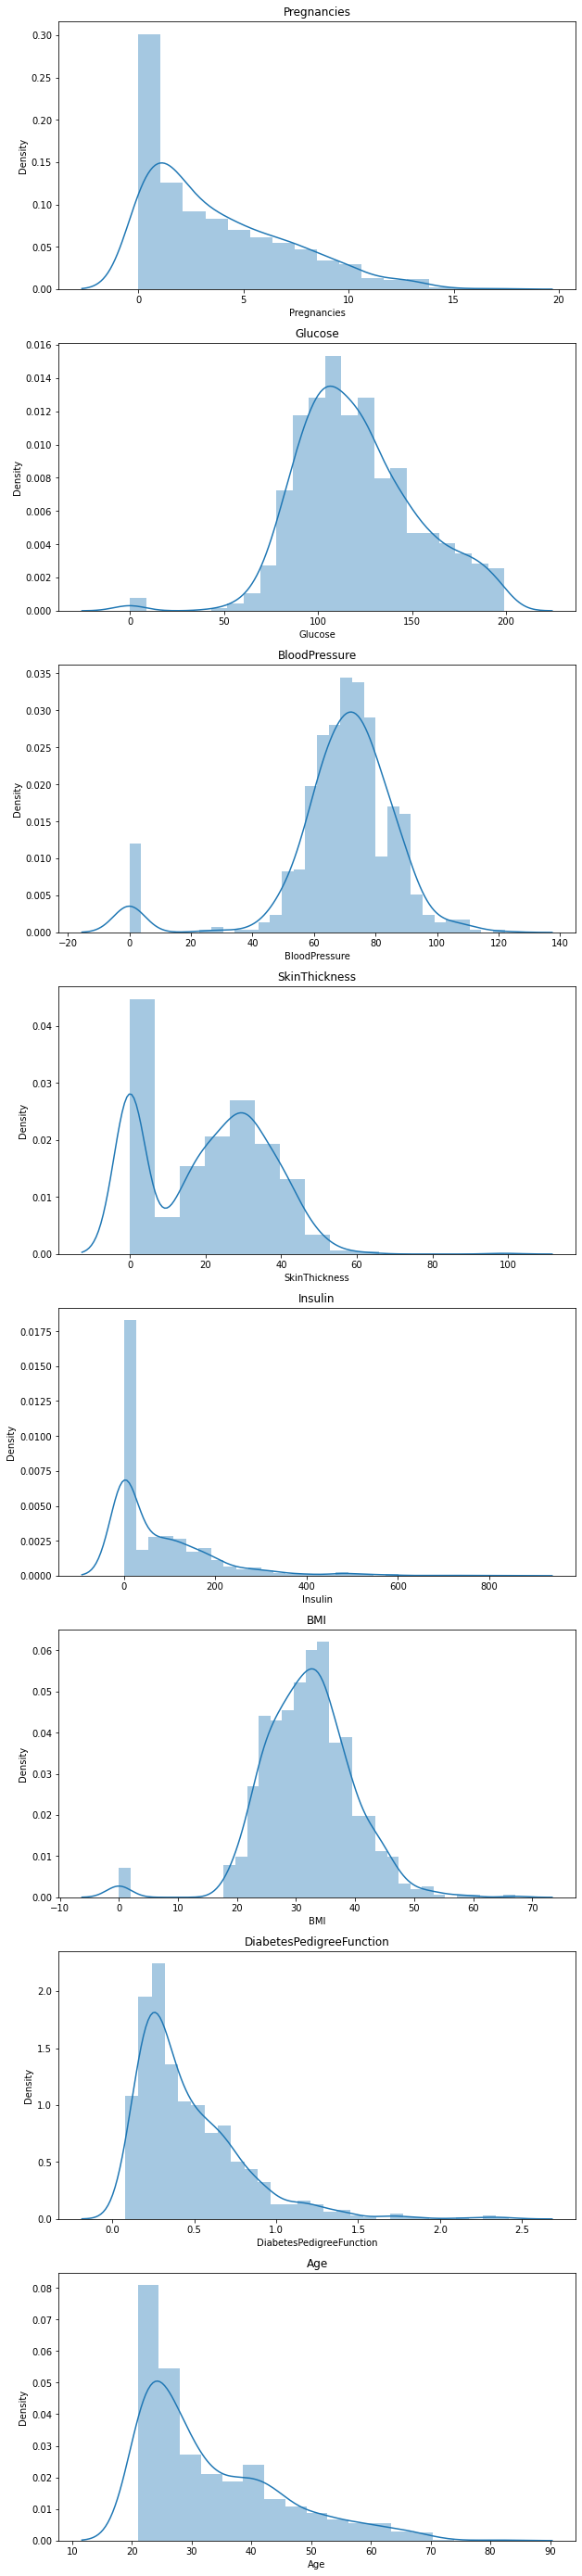

In [ ]:
cols = df.columns[:-1]

figure, ax = plt.subplots(nrows=len(cols), ncols=1)
figure.set_size_inches(10,50)

for idx, col in enumerate(cols):
  sns.distplot(df[col], ax=ax[idx])
  ax[idx].set(title=col)

In [ ]:
# 0값이 결측치이기 때문에 이 값들을 평균 값으로 대체

zero_features = ['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']

total_count = df.shape[0]

for f in zero_features:
  zero_count = df[df[f] == 0][f].count()
  print('{0}의 0 건수는 {1}개, 퍼센트는 {2:.2f} %'.format(f, zero_count, zero_count/total_count))
  print('='*50)

Glucose의 0 건수는 5개, 퍼센트는 0.01 %
BloodPressure의 0 건수는 35개, 퍼센트는 0.05 %
SkinThickness의 0 건수는 227개, 퍼센트는 0.30 %
Insulin의 0 건수는 374개, 퍼센트는 0.49 %
BMI의 0 건수는 11개, 퍼센트는 0.01 %


In [ ]:
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)
# 0 값이 사라진 것을 알 수 있음
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler_df = pd.DataFrame(data=x_scaler, columns=cols)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.222711,0.659428,0.065376,-0.908682,2.532136
764,-0.547919,0.010468,-0.186224,0.040885,-0.417768,0.632988,-0.398282,-0.531023
765,0.342981,-0.022409,-0.021044,-0.374700,-0.071599,-0.909751,-0.685193,-0.275760
766,-0.844885,0.141977,-1.012121,-0.630654,-0.417768,-0.342140,-0.371101,1.170732


In [ ]:
x_scaler_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,-1.481743e-16,-8.655547e-17,2.385968e-16,-1.176721e-16,6.253678e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.553955e+00,-3.985352e+00,-2.037044e+00,-1.125139e+00,-2.074083e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.210503e-01,-6.817623e-01,-6.306536e-01,-4.177681e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.539182e-01,-2.104440e-02,-3.747004e-01,-4.177681e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.104773e-01,6.396735e-01,5.603676e-01,9.234424e-02,6.038797e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542014e+00,4.108443e+00,7.521430e+00,7.819199e+00,5.042893e+00,5.883565e+00,4.063716e+00


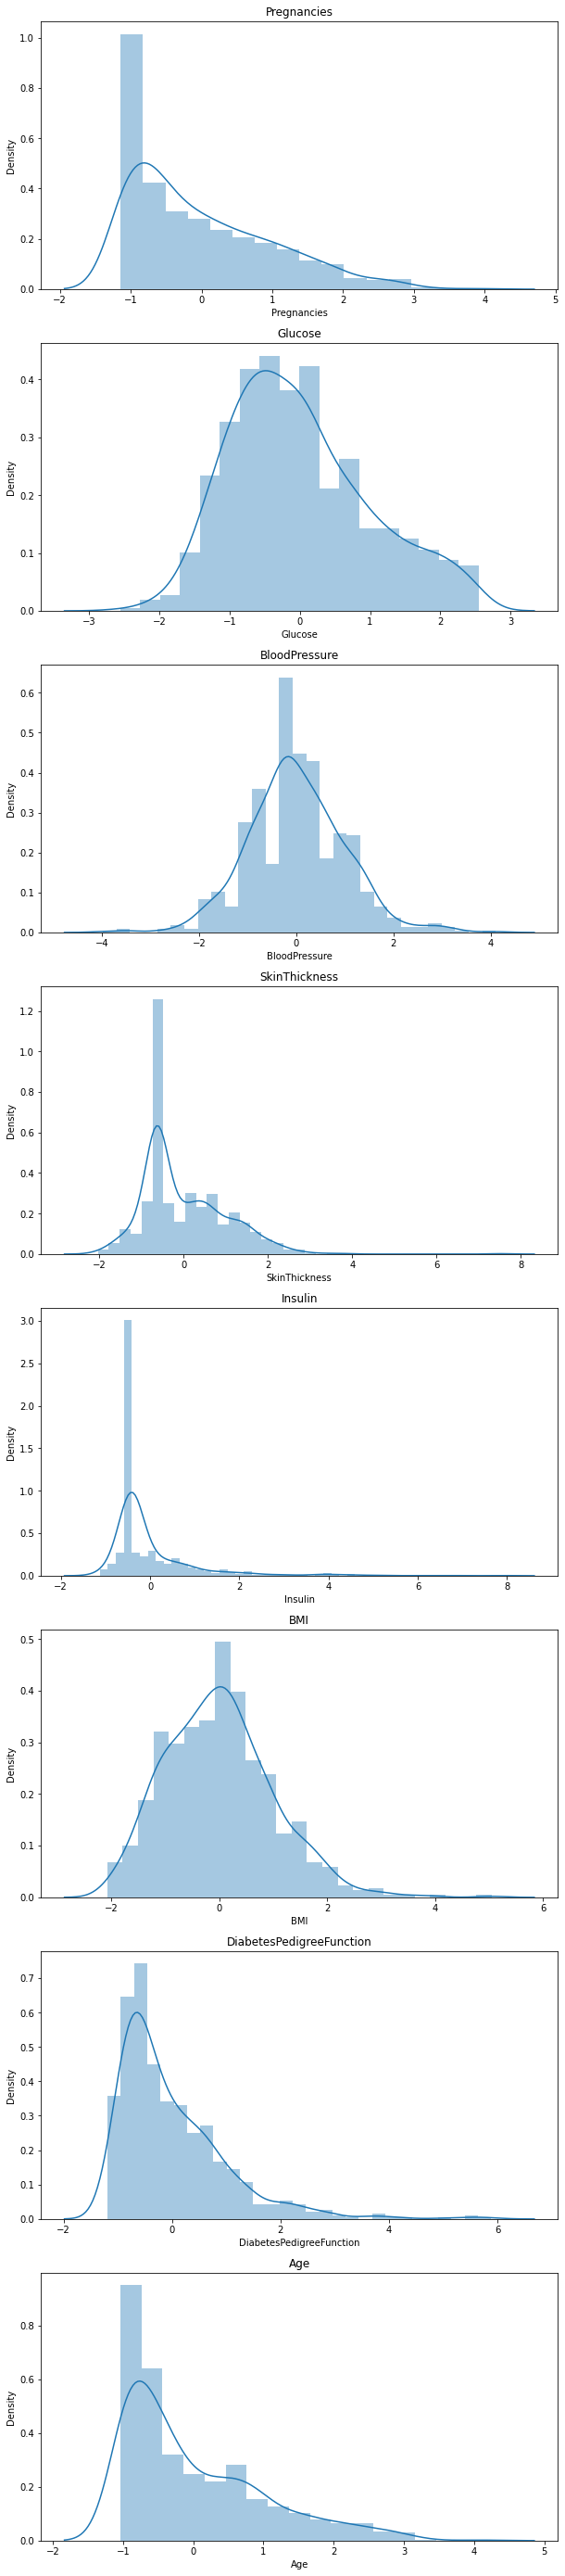

In [ ]:
cols = df.columns[:-1]

figure, ax = plt.subplots(nrows=len(cols), ncols=1)
figure.set_size_inches(10,50)

for idx, col in enumerate(cols):
  sns.distplot(x_scaler_df[col], ax=ax[idx])
  ax[idx].set(title=col)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.2, random_state = 156, stratify=y)

lr_cif = LogisticRegression()
lr_cif.fit(x_train, y_train)
pred = lr_cif.predict(x_test)
pred_proba = lr_cif.predict_proba(x_test)
pred_proba_c1 = pred_proba[:, 1]

get_clf_eval(y_test, pred, pred_proba_c1)

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 스코어: 0.6804, AUC: 0.8433


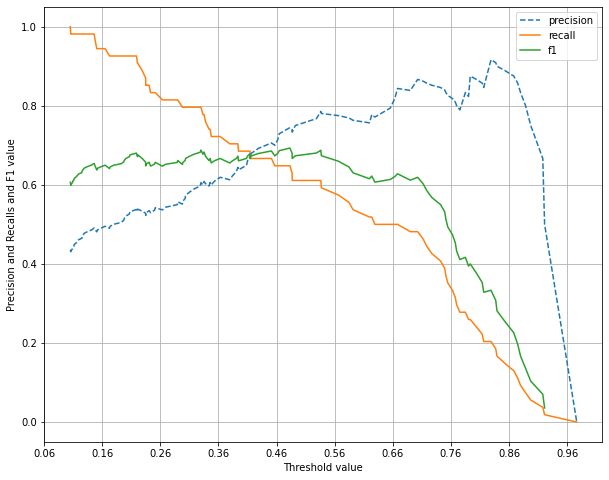

In [ ]:
precision_recall_curve_plot_and_f1(y_test, pred_proba_c1)

In [ ]:
# 임계 값을 조정하여 재현율 값을 조정함

from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold= 0.48)
pred_th_048 = binarizer.fit_transform(pred_proba_c1.reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba_c1)

오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481, F1 스코어: 0.6931, AUC: 0.8433
